## `Занятие 02: Введение в нейросети. MLP. Инициализация сетей`

О чём можно узнать из этого ноутбука:

* Основные принципы DL
* Базовые методы оптимизации нейронных сетей
* Проблема затухания/взрыва градиентов и методы её решения с помощью выбора функций активации и инициализации весов

## `Глубинное обучение`

1. В чём недостатки тех классических методов машинного обучения, которые уже были изучены ранее? 

<details>

<summary><b>Ответ:</b> </summary> 

    Работа с "естественным" данными такими как изображения, звук, видео в парадигме "классического ML" требует предварительного выделения признаков из исходных данных. Определение хорошего признакового пространства зачастую оказывается сложной задачей, которую необходимо выполнять "руками".
    
<img src="./images/Classical ML.jpg" width="800" height="600"/>
    
     Нейронные сети же позволяют выделять качественные признаки, учитывая структурную иерархию в данных.
     
<img src="./images/DL features pipeline.jpg" width="800" height="600"/>
    
    
</details>

Логичный вопрос — как получить возможность выделять признаки из структурированного объекта (например, изображения).
В этом нам помогают два концепта:

1. **Перцептрон**
2. **Многослойность**

## `Перцептрон`

![Диаграмма биологического нейрона](./images/Biological%20Neuron.jpg)

Прообразом перцептрона послужил **биологический нейрон**. У нейрона можно выделить следующие компоненты:
1. Множество **дендритов**, через которые поступают входные сигналы
2. **Аксон**, через из которого выходит сигнал, образованный преобразованием входных сигналов

Моделью биологического нейрона можно считать **перцептрон**

![Перцептрон](./images/Perceptron.png)

То есть, математически перцептрон сначала выполняет линейное преобразование, а затем применяет нелинейную функцию к своему выходу. В общем виде это можно записать так:

$$y = g(\sum_{i=1}^{m}w_{i}x_{i} + b) $$

В чём проблема такой модели?

<details>

<summary><b>Ответ:</b> </summary> 
    
    Такое преобразование задаёт класс функций, который не является универсальным аппроксиматором, то есть мы не можем представить произвольную функцию с помощью перцептрона.
    Пример: задача XOR
    

<img src="./images/XOR.jpg" width="800" height="600"/>

</details>

Другим недостатком такой модели является невозможность использвания комбинаций признаков, в том числе высокоуровневых. 

Решением этих двух проблем является многослойная структура нейронных сетей.

## `Многослойный перцептрон`

Для начала объединим несколько нейронов в один слой. Каждый нейрон будет отвечать за выделение того или иного признака на данном уровне. Затем, мы можем поверх нейронов первого слоя добавить нейроны второго слоя, которые смогут вычислять попарные комбинации признаков первого уровня. 

![MLP](./images/MLP.jpg)

Математически, многослойный перцептрон можно записать следующим образом:
    
$$
y = W^{L}g(...g(W^{2}g(W^{1}x + b^{1}) + b^{2})... + b^{L - 1}) + b^{L}
$$

Сразу же возникают следующие вопросы:
1. Какую функцию активации лучше всего использовать?
2. Сколько нужно перцептронов в каждом слое? (То есть оптимальная размерность каждого слоя)
3. Сколько нужно слоёв в MLP?
4. Насколько широкий класс функций может приближать получившаяся модель?

Ответ на последний вопрос даёт теорема об универсальном аппроксиматоре:

### `Теорема об универсальном аппроксиматоре`

**Утверждение:**

Положим, $f(x)$ определена и непрерывна на отрезке $[a, b]$. Тогда, существует многослойный перцептрон с двумя скрытыми слоями равномерно приближающий $f$ на $[a, b]$.

**Доказательство:**

Разобьём отрезок $[a, b]$ на $N_{\epsilon}$ отрезков таких, что $\sup\limits_{x_{1}, x_{2} \in [a_{i}, b_{i}]}|f(x_{1}) - f(x_{2})| < \frac{\epsilon}{2}$. Положим $f_{i} = f(a_{i})$.

Заметим, 
$$f(x) = \sum\limits_{i=1}^{N_{\epsilon}} \mathbb{1}[x \in [a_{i}, b_{i}]]f_{i} = \sum\limits_{i=1}^{N_{\epsilon}} \mathbb{1}[\mathbb{1}[x > a_{i}] + \mathbb{1}[x < b_{i}] > 1]f_{i}$$

Положим, что MLP использует функцию активации, такую что:
$$
\lim_{x\rightarrow -\infty}g(x) = A\;\;\;\; \lim_{x\rightarrow \infty}g(x) = B\;\;\;\; A \leq g(x) \leq B \;\forall x \in \mathbb{R} \;\; (1)
$$

Без потери общности будем считать, что $A = 0, B = 1$

Тогда, после первого слоя MLP вычислим величины $g^{a_{i}} = g(\frac{a_{i} - x}{h}), g^{b_{i}} = g(\frac{x - b_{i}}{h})$

Затем, на втором слое вычислим: $g^{i} = g(\frac{g^{a_{i}} - g^{b_{i}} - 1}{h}) \overset{h \rightarrow 0}{\longrightarrow} \mathbb{1}[\mathbb{1}[x > a_{i}] + \mathbb{1}[x < b_{i}] > 1] = \mathbb{1}[x \in [a_{i}, b_{i}]]$. 

Тогда, положим $h$ таким, что $|\mathbb{1}[x \in [a_{i}, b_{i}]] - g^{i}| < \frac{\epsilon}{2sup_{x\in[a, b]}f(x)} \; \forall i \in \{1, ..., N_{epsilon}\}$.

Тогда, положив веса MLP на выходном слое равными $f_{i}$ получим, что MLP в точности равен:
$$\hat{f}(x) = \sum\limits_{i=1}^{N_{\epsilon}}g^{i}f_{i}$$

Наконец,
$$
|f(x) - \hat{f}(x)| = |f(x)\mathbb{1}[x \in [a_{j}, b_{j}]] - f_{j}g^{j}| < |f(x)||\mathbb{1}[x \in [a_{j}, b_{j}]] - g^{j}| + |f(x) - f_{j}||g^{j}| < \epsilon \; \forall x \in [a, b]
$$

На самом деле, условие теоремы можно ослабить.
1. Достаточно иметь только один скрытый слой в MLP
2. Необязательно использовать функцию активации, удовлетворяющую $(1)$. Любая неполиномиальная функция, даже неограниченная подходит. (например, $g(x) = \max(0, x)$)

Формально, двух слоёв достаточно для приближения любой функции, однако, на практике, есть проблемы — количество весов, необходимое для аппроксимации растёт экспоненциально с размерностью пространства. То есть сеть становится очень широкой.

## `Обучение нейросетей`

Как было написано ранее, при некоторых условиях (на функцию активации и ширину сетей) класс функций задаваемых MLP очень широк (все возможные непрерывные на компакте функции). Однако, как обучать такие модели? Самым распространённым способом является градиентный спуск и стохастический градиентный спуск.

Положим, что наша нейронная сеть представляет из себя функцию $f_{w}(x)$, где $w \in \mathbb{R}^{D}, x \in \mathbb{R}^{d}$ — тензоры параметров и признаков. Положим $D = \{(x_{i}, y_{i})\}_{1}^{n}$ — обучающая выборка. $L(\hat{y}, y)$ -- функция потерь. Наша задача заключается в минимизации эмпирического риска для заданной выборки и функции потерь:
$$
\mathfrak{L} = \mathfrak{L}(w) = \mathbb{E}_{x, y \sim D}L(f_{w}(x), y) = \frac{1}{n}\sum\limits_{i=1}^{n}L(f_{w}(x_{i}), y_{i}) = \frac{1}{n}\sum\limits_{i=1}^{n}L_{i}(w) \longrightarrow \min\limits_{w}
$$

Тогда, можно предложить итеративный алгоритм для поиска локальных минимумов функции $\mathfrak{L}$ — **градиентный спуск**:
$$
w^{i+1} = w^{i} - \epsilon_{i}\nabla_{w}\mathfrak{L}(w) = w^{i} - \epsilon_{i}\Delta^{i}
$$

Запишем эквивалентно приращение параметров модели:
$$
\Delta^{i} = \nabla_{w}\mathfrak{L}(w) = \frac{1}{n}\sum\limits_{j=1}^{n}\nabla_{w}L_{j}(w) \;\; (2)
$$

Оценим сложность одной итерации такого алгоритма. Допустим, вычисление $\nabla_{w}L_{j}$ требует $\mathcal{O}(s)$ операций. Тогда вычисление по формуле $(2)$ требует $\mathcal{O}(ns)$ операций. 

Однако, при работе с большими выборками ($n >> 1$), а именно такие чаще всего встречаются при работе с нейросетями, линейная зависимость времени работы от размера выборки вычислительно недопустима. 

Для решения этой проблемы обычно применяется **стохастический градиентный спуск**. Основное отличие SGD от SD состоит в использовании несмещённой оценки градиента эмпирического риска:

$$
\Delta^{i} = \frac{1}{|I_{i}|}\sum\limits_{j \in I_{i}}\nabla_{w}\mathfrak{L}^{j}(w),\;\; I_{i} \sim \mathcal{U}[\mathfrak{B}] \;\; (3)
$$
Где $\mathfrak{B}$ -- множество всех возможных батчей размера $B$ без повторений элементов внутри батча.

В таком случае, сложность одной операции перестаёт зависеть от $n$: $\mathcal{O}(Bs) = \mathcal{O}(s)$ что позволяет реализовать данный алгоритм на практике.

Однако, у SGD появляются отличия по сравнению с SG:
1. Итерации $(3)$ не обязательно уменьшают $\mathfrak{L}$ даже при очень малых $\epsilon$, что с одной стороны может замедлить сходимость, но с другой стороны позволяет не застревать в локальных минимумах.
2. Сложнее определить критерий останова, так как, например, в случае с SD в точке минимума $\Delta^{i} = 0$, а для SGD это неверно.
4. Добавляется ещё один гиперпараметр, который может значительно влиять на процесс обучения.
4. Наличие дисперсии в оценке градиента может не позволить сойтись SGD при константном темпе обучения. SGD будет "сходится" к некой области, называемой **confusion region**.
5. Выбор оптимального темпа обучения очень важен, чтобы соблюсти баланс между размером confusion region и скоростью сходимости.

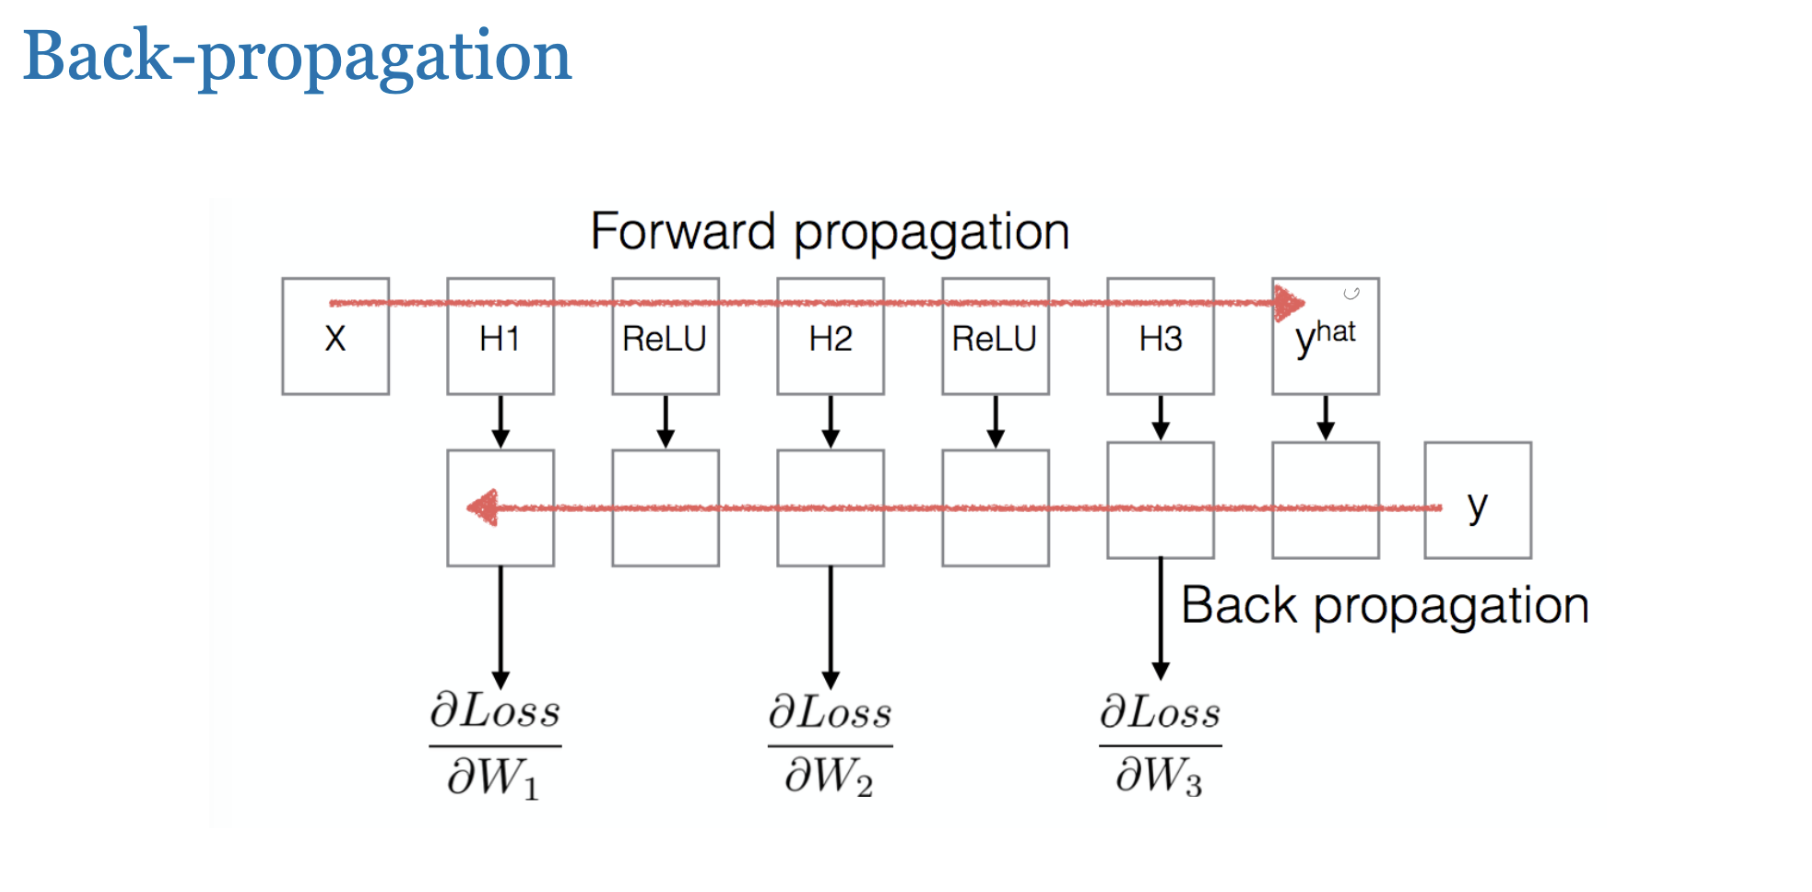

In [7]:
%matplotlib inline

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [9]:
def get_sgd_iters(log10_epsilon=-4.0):
    # Make SGD iterations
    n_steps = 1000
    epsilon = 10.0 ** log10_epsilon
    x = torch.tensor([10.0, 10.0, 10.0])
    y = torch.tensor([-10.0, 0.0, 20.0])
    w_gd = torch.tensor([-5.0], requires_grad=True)
    w_sgd = torch.tensor([-5.0], requires_grad=True)
    weights_gd = []
    weights_sgd = []
    for step in range(n_steps):
        weights_gd.append(w_gd.item())
        weights_sgd.append(w_sgd.item())
        
        loss_gd = torch.sum(torch.square(x * w_gd - y))
        loss_gd.backward()

        idx = torch.randint(high=x.shape[0], size=[1])
        loss_sgd = torch.square(x[idx] * w_sgd - y[idx])
        loss_sgd.backward()

        with torch.no_grad():
            w_gd.sub_(epsilon * w_gd.grad)
            w_sgd.sub_(epsilon * w_sgd.grad)
        w_gd.grad.detach_()
        w_gd.grad.zero_()  
        w_sgd.grad.detach_()
        w_sgd.grad.zero_()    
    weights_gd = np.array(weights_gd)
    weights_sgd = np.array(weights_sgd)
    
    # Evaluate loss
    dots = torch.linspace(-5, 5, 1000)
    full_loss = torch.sum(torch.square(x[:, None] * dots[None, :] - y[:, None]), dim=0).numpy() / 3
    loss_batch_01 = torch.sum(torch.square(x[0:1][:, None] * dots[None, :] - y[0:1][:, None]), dim=0).numpy()
    loss_batch_02 = torch.sum(torch.square(x[1:2][:, None] * dots[None, :] - y[1:2][:, None]), dim=0).numpy()
    loss_batch_03 = torch.sum(torch.square(x[2:3][:, None] * dots[None, :] - y[2:3][:, None]), dim=0).numpy()
    
    # Plot stuff
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(dots, full_loss + 100, label=r'$\mathfrak{L} = \frac{1}{3}(L_{1} + L_{2} + L_{3})$')
    ax.plot(dots, loss_batch_01 + 100, label='$L_{1}$')
    ax.plot(dots, loss_batch_02 + 100, label='$L_{2}$')
    ax.plot(dots, loss_batch_03 + 100, label='$L_{3}$')

    weights_sgd_selected = np.concatenate([weights_sgd[:500], weights_sgd[500::30]])
    colors = [(1, 0, 0, alpha) for alpha in np.linspace(0.2, 1.0, weights_sgd_selected.shape[0])]
    ax.scatter(weights_sgd_selected, np.zeros_like(weights_sgd_selected), c=colors, s=15, edgecolors='none', label='SDG')
    
    weights_gd_selected = np.concatenate([weights_gd[:500], weights_gd[500::30]])
    colors = [(0, 0, 1, alpha) for alpha in np.linspace(0.2, 1.0, weights_gd_selected.shape[0])]
    ax.scatter(
        weights_gd_selected, np.zeros_like(weights_gd_selected) - 100, c=colors, s=15, edgecolors='none', label='GD')
    
    
    ax.vlines([dots[np.argmin(full_loss)]], -200, 2000, linestyles=['dashed'], label='$argmin\mathfrak{L}$')
    
    ax.set_ylim(-200, 1250)
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [10]:
_ = interact(
    get_sgd_iters, 
    log10_epsilon=widgets.FloatSlider(
        value=-4.0, min=-5.0, max=-2.5, step=0.2, description=r'$log_{10}\epsilon$'
    )
)

interactive(children=(FloatSlider(value=-4.0, description='$log_{10}\\epsilon$', max=-2.5, min=-5.0, step=0.2)…

Чтобы лучше понять как выбор темпа обучения влияет на процесс обучения рассмотрим некоторые оценки на скорость сходимости для SGD. Для простоты, будем рассматривать случай *выпуклых функций*.

Если $\mathfrak{L}$ — выпукла, тогда, для SGD с темпом обучения $\epsilon_{i}$ верно:
$$
\mathbb{E}\mathfrak{L}(\bar{w}^{k}) - \mathfrak{L}(w^{*}) \leq \frac{||w^{0} - w^{*}||^{2} + \sum\limits_{i=1}^{k}\epsilon_{k}^{2}\mathbb{E}||\nabla\mathfrak{L}(w^{i})||^{2}}{2\sum\limits_{i=1}^{k}\epsilon_{k}} \leq \frac{R^{2} + G^{2}\sum\limits_{i=1}^{k}\epsilon_{k}^{2}}{2\sum\limits_{i=1}^{k}\epsilon_{k}} \;\;\; (4)
$$

Где 
$$
\bar{w}^{k} = \frac{\sum\limits_{i=1}^{k}\epsilon_{k}w^{k}}{\sum\limits_{i=1}^{k}\epsilon_{k}}
$$

Рассмотрим 2 стратегии выбора темпа обучения:

1. 
    $\epsilon_{i} = \epsilon \; \forall i$

    Тогда, 
    $$
    \mathbb{E}\mathfrak{L}(\bar{w}^{k}) - \mathfrak{L}(w^{*}) \leq \frac{R^2}{2\epsilon(k+1)} + \frac{G^2\epsilon}{2} \overset{k\rightarrow\infty}{\longrightarrow} \frac{G^2\epsilon}{2} 
    $$
    То есть, мы не можем гарантировать сходимость к оптимуму. На практике, это означает, что размер confusion region пропорционален величине темпа обучения и, уменьшая темп обучения мы сможем добиться сходимости SGD. 
    
    При этом, первое слагаемое отвечает за скорость сходимости — при малых темпах обучения SGD будет сходится медленнее, но к меньшей ошибке.

2. $\sum\limits_{i=1}^{k}\epsilon_{k}\overset{k\rightarrow\infty}{\longrightarrow} \infty, \sum\limits_{i=1}^{k}\epsilon_{k}^{2} < \infty$

    Тогда,
    $$
    \mathbb{E}\mathfrak{L}(\bar{w}^{k}) - \mathfrak{L}(w^{*}) \overset{k\rightarrow\infty}{\longrightarrow} 0
    $$
    То есть, мы гарантируем сходимость к оптимальному решению, однако необходимо выбирать такую стратегию уменьшения темпа обучения, чтобы максимизировать скорость сходимости.

## `Улучшения GD`

### `Стандартный GD`

Рассмотрим следующую задачу оптимитизации:
$$
    \mathfrak{L}(w) = \frac{1}{2}w^{T}Aw - w^{T}b \longrightarrow \min_{w}
$$
Предположим, что мы пытаемся её решить с помощью итераций GD. Одна из проблем с SGD в том, что когда функция попадает в "овраг", то есть по одному из направлений имеем быстрый спуск, а по другому медленный, то SGD приводит к осцилляции и крайне медленной сходимости к минимуму.

![](images/sgd.svg)

In [11]:
def get_sgd_landscape(optimizer_class, label, *optimizer_args, **optimizer_kwargs):
    # Make SGD iterations
    n_steps = 100
    A = torch.tensor([
        [100.0, 6.0],
        [-2.0, 1.0]
    ])
    b = torch.tensor([-1., 2.0])
    w = torch.tensor([1.0, 4.5], requires_grad=True)
    x = torch.randn([1000])
    losses = []
    weights = []
    if optimizer_class == torch.optim.SGD:
        optimizer_kwargs = {
            'lr': optimizer_kwargs.get('lr', 0.0),
            'momentum': optimizer_kwargs.get('momentum', 0.0),
            'weight_decay': optimizer_kwargs.get('weight_decay', 0.0)
        }
    elif optimizer_class == torch.optim.Adagrad:
        optimizer_kwargs = {
            'lr': optimizer_kwargs.get('lr', 0.0),
            'weight_decay': optimizer_kwargs.get('weight_decay', 0.0)
        }
    elif optimizer_class == torch.optim.RMSprop:
        optimizer_kwargs = {
            'lr': optimizer_kwargs.get('lr', 0.0),
            'alpha': optimizer_kwargs.get('alpha', 0.0),
            'momentum': optimizer_kwargs.get('momentum', 0.0),
            'weight_decay': optimizer_kwargs.get('weight_decay', 0.0)
        }
    elif optimizer_class == torch.optim.Adam:
        optimizer_kwargs = {
            'lr': optimizer_kwargs.get('lr', 0.0),
            'weight_decay': optimizer_kwargs.get('weight_decay', 0.0),
            'betas': (optimizer_kwargs.get('beta_1', 0.0), optimizer_kwargs.get('beta_2', 0.0))
        }
        
    optimizer = optimizer_class([w], *optimizer_args, **optimizer_kwargs)
    for step in range(n_steps):
        weights.append(w.clone().detach().numpy())

        loss = w @ A @ w + b @ w
#         noise = torch.tensor(np.random.normal(loc=1.0, scale=1.0, size=[2])).to(dtype=torch.float32)
        noise = torch.tensor([1.0, 1.0]).to(dtype=torch.float32)
        loss_stoch = (noise * w) @ A @ (noise * w) + b @ (noise * w)
        loss_stoch.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        losses.append(loss.item())
    losses = np.array(losses)
    weights = np.array(weights)

    # Evaluate lanscape
    n_dots = 25
    x = np.repeat(np.linspace(-5.0, 5.0, n_dots)[None, :], n_dots, axis=0)
    y = np.repeat(np.linspace(-5.0, 5.0, n_dots)[:, None], n_dots, axis=1)
    dots = torch.cat([torch.tensor(x)[None, :, :], torch.tensor(y)[None, :, :]], dim=0)
    dots = dots.to(dtype=torch.float32).reshape(2, -1)
    z = (torch.sum(dots * torch.matmul(A[:, :], dots), dim=0) + torch.sum(b[:, None] * dots, dim=0)).numpy()
    z = z.reshape(n_dots, n_dots)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))  # type: typing.Any, typing.List[plt.Axes]

    contours = ax.contour(x, y, z, levels=50)
    ax.clabel(contours, inline=1, fontsize=6)
    ax.set_title(fr'{label} trajectory')

    colors = np.array([(1, 0, 0, alpha) for alpha in np.linspace(0.2, 1.0, weights.shape[0])])
    ax.scatter(weights[:, 0], weights[:, 1], c=colors, s=15, edgecolors='none', label=f'{label}')

    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [12]:
_ = interact(
    lambda **kwargs: get_sgd_landscape(optimizer_class=torch.optim.SGD, label='SGD', **kwargs),
    lr=widgets.FloatLogSlider(value=9e-3, base=10, min=-5, max=-1, step=0.1, description=r'$\epsilon$')
)

interactive(children=(FloatLogSlider(value=0.009, description='$\\epsilon$', max=-1.0, min=-5.0), Output()), _…

### `GD с инерцией`

Для решения данной проблемы в был предложен подход, который увеличивает шаг по направлению к минимуму, и уменьшает осцилляцию. Это достигается за счёт того, что изменение параметров на очередном шаге рассчитывается как взвешенная сумма изменений на предыдущем шаге и градиента функции потерь на текущем шаге. Обозначим градиент функции потерь на $i$ шаге: $g^{i} = \nabla_{w}\mathfrak{L}(w^{i})$

$$
\Delta^{i} = \gamma \Delta^{i - 1} + \nabla\mathfrak{L} = \sum\limits_{k=0}^{i}\gamma^{i-k}g^{k}
$$

$$
w^{i + 1} = w^{i} - \epsilon_{i}\Delta^{i}
$$

Скорость движения в направлении минимума увеличивается (так как это направление присутствует во всех градиентах), а осцилляция гасится. Весовой параметр $\gamma$ обычно выбирается равным 0.9 или близко к тому.

![](images/sgd+momentum.svg)

In [13]:
_ = interact(
    lambda **kwargs: get_sgd_landscape(optimizer_class=torch.optim.SGD, label='SGD + momentum', **kwargs),
    lr=widgets.FloatLogSlider(value=9e-3, base=10, min=-5, max=-1, step=0.5, description=r'$\epsilon$'), 
    momentum=widgets.FloatSlider(value=0.30, min=0.0, max=1.0, step=0.01, description=r'$\gamma$')
)

interactive(children=(FloatLogSlider(value=0.009, description='$\\epsilon$', max=-1.0, min=-5.0, step=0.5), Fl…

### `AdaGrad`

Хотя добавление инерции ускоряет сходимость, выбор оптимального темпа обучения может оставаться трудной задачей. При этом, обновление всех параметров идет с одинаковой скоростью, хотя некоторые группы параметров может требоваться обновлять значительно чаще. Можно решить эту проблему, например, задав вручную темпы обучения для каждого параметра по отдельности. Однако, на практике такой подход невозможен, так как число параметров может быть слишком большим. Для решения этой проблемы можно ввести **адаптивный темп обучения**.  
Будем использовать следующую стратегию: если какой-то параметр в процессе обучения изменялся сильно, то его темп обучения снижается, и наоборот — те параметры, которые редко меняются получают больший темп обучения. Обозначим градиент функции потерь на $i$ шаге по $j$ параметру: $g^{i}_{j} = \nabla_{w_{j}}\mathfrak{L}(w^{i})$
$$
v^{i}_{j} = \sum\limits_{k=0}^{i}(g^{k}_{j})^{2},\;\;\Delta^{i}_{j} = \frac{g^{i}_{j}}{\sqrt{v^{i}_{j}} + \epsilon}
$$
$$
w^{i+1} = w^{i} - \epsilon_{i}\Delta^{i}
$$

Заметим, что данный метод инвариантен к покомпонентному масштабированию параметров модели, что позволит избегать сложностей при минимизации функций, вытянутых по направлениям, коллинеарным осям координат, без использования инерции.

In [14]:
_ = interact(
    lambda **kwargs: get_sgd_landscape(optimizer_class=torch.optim.Adagrad, label='AdaGrad', **kwargs),
    lr=widgets.FloatLogSlider(value=1e0, base=10, min=-3.0, max=1.0, step=0.5, description='$\epsilon$')
)

interactive(children=(FloatLogSlider(value=1.0, description='$\\epsilon$', max=1.0, min=-3.0, step=0.5), Outpu…

### `RMSProp`

Недостатком метода AdaGrad можно считать то, что эффективный темп обучения $\frac{\epsilon_{i}}{\sqrt{v^{i}_{j}} + \epsilon}$ может стремиться к нулю, так как величина в знаменателе всегда увеличивается.

Для решения этой проблемы возьмём в качестве меры изменения отдельного параметра не сумму всех его градиентов, а взвешенное среднее. Это позволит "забывать" большие приращения на первых итерациях и позволит темпу обучения не затухать.
$$
v^{i}_{j} = \alpha v^{i-1}_{j} + (1 - \alpha)(g^{i}_{j})^{2},\;\;\Delta^{i}_{j} = \frac{g^{i}_{j}}{\sqrt{v^{i}_{j}} + \epsilon}
$$
$$
w^{i+1} = w^{i} - \epsilon_{i}\Delta^{i}
$$

In [15]:
_ = interact(
    lambda **kwargs: get_sgd_landscape(optimizer_class=torch.optim.RMSprop, label='RMSProp', **kwargs),
    lr=widgets.FloatLogSlider(value=1e-1, base=10, min=-3, max=1.0, step=0.5, description='$\epsilon$'), 
    alpha=widgets.FloatSlider(value=0.99, min=0.0, max=1.0, step=0.01, description=r'$\alpha$'),
    momentum=widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='$\gamma$')
)

interactive(children=(FloatLogSlider(value=0.1, description='$\\epsilon$', max=1.0, min=-3.0, step=0.5), Float…

### `Adam`

Объединим идеи экспоненциального сглаживания для оценки оптимального шага (momentum) и оптимального темпа обучения (RMSProp):
$$
m^{i}_{j} = \beta_{1}m^{i-1}_{j} + (1 - \beta_{1})g^{i}_{j}
$$
$$
v^{i}_{j} = \beta_{2}v^{i-1}_{j} + (1 - \beta_{v})(g^{i}_{j})^2
$$

Заметим, что из-за такого сглаживания оценки моментов имеют "сдвиг" к нулю. То есть $m^{i}, v^{i}$ являются смещёнными оценками первого и второго момента градиента $\mathbb{E}g^{i}, \mathbb{E}(g^{i})^{2}$.

Действительно:
$$
m^{i}_{j} = \beta_{1}^{2}m^{i-2}_{j} + (1 - \beta_{1})(\beta_{1}g^{i-1}_{j} + g^{i}_{j}) = ... = (1-\beta_{1})\sum\limits_{k=1}^{i}\beta_{1}^{i-k}g^{k}_{j}
$$
$$
v^{i}_{j} = \beta_{2}^{2}v^{i-2}_{j} + (1 - \beta_{2})(\beta_{2}(g^{i-1}_{j})^2 + (g^{i}_{j})^{2}) = ... = (1-\beta_{2})\sum\limits_{k=1}^{i}\beta_{2}^{i-k}(g^{k}_{j})^{2}
$$
В предположении, что распределение градиентов в процессе обучения *почти стационарно*:
$$
\mathbb{E}m^{i}_{j} = (1-\beta_{1})\sum\limits_{k=1}^{i}\beta_{1}^{i-k}\mathbb{E}g^{k}_{j} \approx \mathbb{E}g^{k}_{j}(1-\beta_{1})\frac{1-\beta_{1}^{i}}{1-\beta_{1}} = \mathbb{E}g^{k}_{j}(1-\beta_{1}^{i})
$$
$$
\mathbb{E}v^{i}_{j} = (1-\beta_{2})\sum\limits_{k=1}^{i}\beta_{2}^{i-k}\mathbb{E}(g^{k}_{j})^{2} \approx \mathbb{E}(g^{k}_{j})^{2}(1-\beta_{2})\frac{1-\beta_{2}^{i}}{1-\beta_{2}} = \mathbb{E}(g^{k}_{j})^{2}(1-\beta_{2}^{i})
$$

Следовательно, нужно ввести поправки, чтобы получить несмещённые оценки на моменты градиента:
$$
\hat{m}^{i}_{j} = \frac{m^{i}_{j}}{1 - \beta_{1}^{i}}
$$
$$
\hat{v}^{i}_{j} = \frac{v^{i}_{j}}{1 - \beta_{2}^{i}}
$$

Итого, очередной шаг обновления весов:

$$
m^{i}_{j} = \beta_{1}m^{i-1}_{j} + (1 - \beta_{1})g^{i}_{j}
$$
$$
v^{i}_{j} = \beta_{2}v^{i-1}_{j} + (1 - \beta_{2})(g^{i}_{j})^2
$$
$$
\hat{m}^{i}_{j} = \frac{m^{i}_{j}}{1 - \beta_{1}^{i}},\; \hat{v}^{i}_{j} = \frac{v^{i}_{j}}{1 - \beta_{2}^{i}},\; \Delta^{i}_{j} = \frac{\hat{m}^{i}_{j}}{\sqrt{\hat{v}^{i}_{j}} + \epsilon}
$$
$$
w^{i+1} = w^{i} - \epsilon_{i}\Delta^{i}
$$

In [16]:
_ = interact(
    lambda **kwargs: get_sgd_landscape(optimizer_class=torch.optim.Adam, label='Adam', **kwargs),
    lr=widgets.FloatLogSlider(value=1e-1, base=10, min=-2, max=1.0, step=0.2, description=r'$\epsilon$'), 
    beta_1=widgets.FloatSlider(value=0.9, min=0.0, max=1.0, step=0.05, description=r'$\beta_{1}$'),
    beta_2=widgets.FloatSlider(value=0.999, min=0.0, max=1.0, step=0.0001, description=r'$\beta_{2}$')
)

interactive(children=(FloatLogSlider(value=0.1, description='$\\epsilon$', max=1.0, min=-2.0, step=0.2), Float…

## `Выбор функции активации`

Ещё один вопрос на который нужно дать ответ при построении нейронных сетей — это выбор подходящей функции активации. Из теоремы об универсальном аппроксиматоре понятно, что класс подходящих функций очень широк. 

Однако, зачем вообще нужна функция активации? Почему её нельзя вообще убрать из MLP?

<details>

<summary><b>Ответ:</b> </summary> 
    
    Потому что в таком случае, MLP будет в точности определять линейное преобразование.
    
</details>

Рассмотрим, как влияет функция активации на процесс обучения нейросети. Рассмотрим MLP без сдвигов из пяти слоёв:

![Simple NN](images/Simple%20NN.jpg)

Для выполнения шага градиентного спуска необходимо посчитать градиенты по всем весам функции потерь:
$$
\frac{\partial\mathfrak{L}}{\partial z_{4}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\frac{\partial z_{5}}{\partial z_{4}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\sigma^{\prime}(w_{5}z_{4})w_{5} 
$$
$$
\frac{\partial\mathfrak{L}}{\partial z_{3}} = \frac{\partial\mathfrak{L}}{\partial z_{4}}\frac{\partial z_{4}}{\partial z_{3}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\sigma^{\prime}(w_{5}z_{4})\sigma^{\prime}(w_{4}z_{3})w_{5}w_{4}
$$
$$
...
$$
$$
\frac{\partial\mathfrak{L}}{\partial z_{0}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\sigma^{\prime}(w_{5}z_{4})\sigma^{\prime}(w_{4}z_{3})\sigma^{\prime}(w_{3}z_{2})\sigma^{\prime}(w_{2}z_{1})\sigma^{\prime}(w_{1}z_{0})w_{5}w_{4}w_{3}w_{2}w_{1}
$$

$$
\frac{\partial\mathfrak{L}}{\partial w_{5}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\frac{\partial z_{5}}{\partial w_{5}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\sigma^{\prime}(w_{5}z_{4})z_{4}
$$
$$
...
$$
$$
\frac{\partial\mathfrak{L}}{\partial w_{1}} = \frac{\partial\mathfrak{L}}{\partial z_{1}}\frac{\partial z_{1}}{\partial w_{1}} = \frac{\partial\mathfrak{L}}{\partial z_{5}}\sigma^{\prime}(w_{5}z_{4})\sigma^{\prime}(w_{4}z_{3})\sigma^{\prime}(w_{3}z_{2})\sigma^{\prime}(w_{2}z_{1})\sigma^{\prime}(w_{1}z_{0})w_{5}w_{4}w_{3}w_{2}z_{0} \;\;\;\; (5)
$$

Заметим, если все множители в формуле $(5)$ вида $\sigma^{\prime}(w_{i}z_{i-1}) < 1$, тогда градиенты $\frac{\mathfrak{L}}{w_{i}}$ экспоненциально убывают (затухают). Аналогично, если $\sigma^{\prime}(w_{i}z_{i-1}) > 1$, то с глубиной градиенты могут взрываться. Таким образом:
1. Значение градиента затухают экспоненциально, если производная функции активации меньше $1$. Как следствие сходимость градиентного спуска замедляется.
2. При малых значениях весов этот эффект усиливается.
3. При больших значениях весов значение градиента может экспоненциально возрастать. Как следствие алгоритм расходится.
4. Эффект мало заметен у сетей с малым числом слоев.

С учётом этих знаний проанализируем основные функции активации.

### `Sigmoid`

$$g(x) = \frac{1}{1 + e^{-x}}$$

In [17]:
def plot_fun(func_name):
    dots = np.linspace(-10, 10, 1000)
    if func_name == 'Sigmoid':
        func = 1.0 / (1 + np.exp(-dots))
        grad = func * (1.0 - func)
    if func_name == 'Tanh':
        func = 2 * (1.0 / (1 + np.exp(-2.0 * dots))) - 1.
        grad = (1 + func) * (1.0 - func)
    if func_name == 'ReLU':
        func = np.maximum(np.zeros_like(dots), dots)
        grad = func > 0
    if func_name == 'LeakyReLU':
        func = np.maximum(0.1 * dots, dots)
        grad = 0.1 * (dots < 0) + (dots > 0)
    if func_name == 'ELU':
        func = (dots > 0) * dots + (dots < 0) * 1.0 * (np.exp(dots) - 1)
        grad = (dots > 0) + (dots < 0) * 1.0 * np.exp(dots)
        
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))
    axes[0].plot(dots, func, label=f'{func_name}')
    axes[1].plot(dots, grad, label=f'{func_name} derivative')  
    
    axes[0].grid(True)
    axes[1].grid(True)    
    axes[0].legend()
    axes[1].legend()    
    
    plt.tight_layout()
    plt.plot()

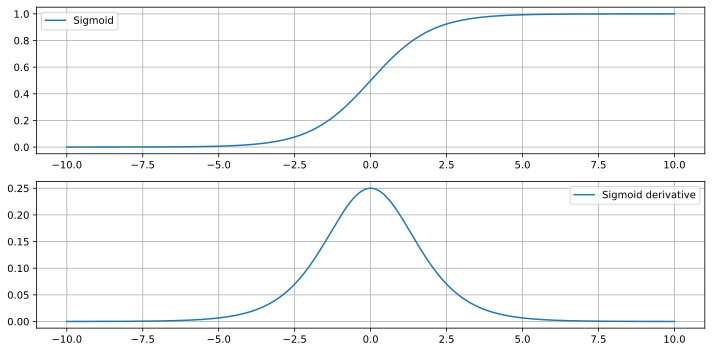

In [18]:
plot_fun('Sigmoid')

Как видно, производная сигмоиды всюду меньше $1$. Как следствие, при использовании такой функции активации велика вероятность затухание градиентов и медленной сходимости параметров глубоких слоёв сети.

Другая проблема заключается в том, что даже если данные из выборки предварительно отнормированы, то сигмоидная функция активации будет смещать распределения активаций после каждого слоя в положительное полупространство. Такое поведение нежелательно, так как нормализованные данные позволяют учитывать все признаки объектов одинаково. Более того, сигмоида может уменьшать дисперсию активаций так как он определяет сжимающее отображение, что может привести к тому, что активации последних слоёв будут распределены в маленьком подпространстве.

### `Tanh`

$$
g(x) = \frac{2}{1-e^{-2x}} - 1
$$

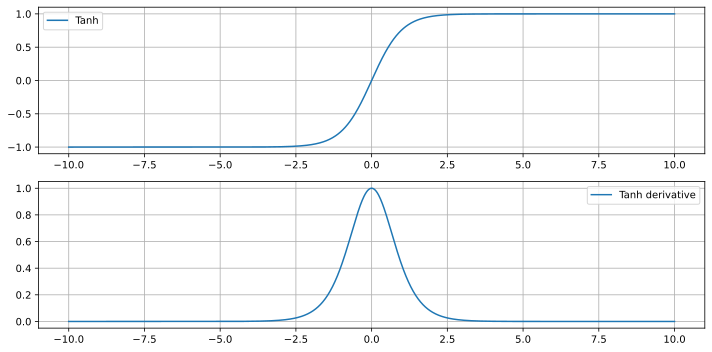

In [5]:
plot_fun('Tanh')

Данная функция всё ещё может вызывать проблему затухания градиентов, так как её производная меньше $1$ почти всюду. При этом, данная функция антисимметрична относительно нуля, что решает вторую проблему сигмоидной активации.

### `ReLU`

$$
g(x) = \max(0, x)
$$

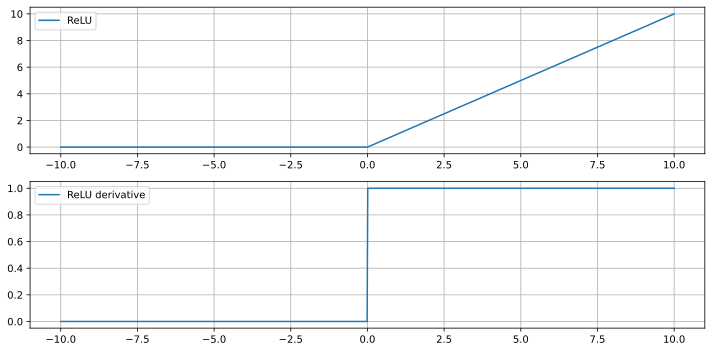

In [6]:
plot_fun('ReLU')

Производная данной функции активации равна $1$ на положительной полупрямой. Это может помочь решать проблему с затуханием градиента, однако, при отрицательных входах градиент будет обращаться в $0$, что опять же может привести к замедлению обучения.

Другой проблемой данной функции является недифференцируемость функции в нуле.

### `LeakyReLU`

$$
g(x) = \begin{cases} 
      \alpha x & x\leq 0 \\
      x & x > 0 
   \end{cases}
$$ 

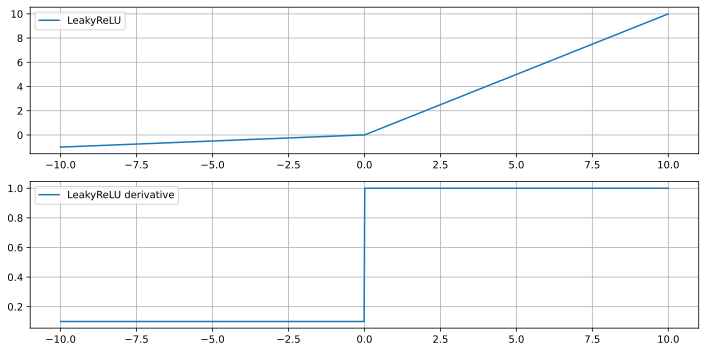

In [19]:
plot_fun('LeakyReLU')

Задание на отрицательной прямой функции активации как линейной функции с малым углом наклона позволяет частично решить проблему с занулением градиентов в ReLU.

### `ELU`

$$
g(x) = \begin{cases} 
      \alpha(e^{x} - 1) & x\leq 0 \\
      x & x > 0 
   \end{cases}
$$ 

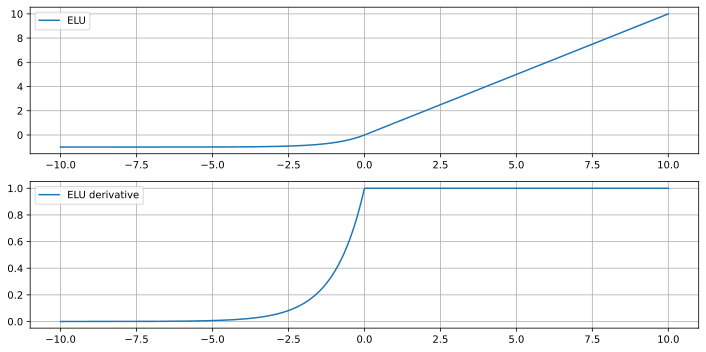

In [20]:
plot_fun('ELU')

При $\alpha = 1$ ELU становится всюду дифференцируемой.

## `Инициализация нейросетей`

Другой важный вопрос который существенно влияет на скорость сходимости и итоговое качество — это инициализация параметров нейросети.

Рассмотрим пример: обучим MLP из трёх слоёв с функцией активации ReLU. В одном случае инициализируем веса сети из $\mathcal{N}(x|0, 0.3)$, а в другом, с помощью инициализации Кайминга.

In [21]:
def compare_inits():
    import os

    # Set proper device for computations
    dtype, device, cuda_device_id = torch.float32, None, 1
    os.environ["CUDA_VISIBLE_DEVICES"] = '{0}'.format(str(cuda_device_id) if cuda_device_id is not None else '')
    if cuda_device_id is not None and torch.cuda.is_available():
        device = 'cuda:{0:d}'.format(0)
    else:
        device = torch.device('cpu')

    import math

    from torchvision import datasets, transforms


    def train(model, device, train_loader, optimizer, epoch):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = torch.nn.functional.nll_loss(output, target)
            loss.backward()
            optimizer.step()

    def test(model, device, test_loader):
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)

        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

        return 100. * correct / len(test_loader.dataset)

    model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(28 * 28, 200),
        torch.nn.ReLU(inplace=True),
        torch.nn.Linear(200, 200),
        torch.nn.ReLU(inplace=True),
        torch.nn.Linear(200, 10),
        torch.nn.LogSoftmax(dim=1)
    ).to(device=device)

    def reset_parameters(model, mode='kaiming'):
        for module in model.modules():
            if isinstance(module, torch.nn.Linear):
                if mode == 'kaiming':
                    torch.nn.init.kaiming_uniform_(module.weight, a=math.sqrt(5))
                    if module.bias is not None:
                        fan_in, _ = torch.nn.init._calculate_fan_in_and_fan_out(module.weight)
                        bound = 1 / math.sqrt(fan_in)
                        torch.nn.init.uniform_(module.bias, -bound, bound)
                if mode == 'zero':
                    torch.nn.init.zeros_(module.bias)
                    torch.nn.init.zeros_(module.weight)
                if mode == 'normal':
                    torch.nn.init.normal_(module.bias, std=0.3)
                    torch.nn.init.normal_(module.weight, std=0.3)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset1 = datasets.MNIST('./data', train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST('./data', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, batch_size=512, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset2, batch_size=512, shuffle=False)

    accuracies_normal = []
    reset_parameters(model, mode='normal')
    for epoch in range(1, 20 + 1):
        train(model, device, train_loader, optimizer, epoch)
        accuracy = test(model, device, test_loader)
        accuracies_normal.append(accuracy)

    accuracies_kaiming = []
    reset_parameters(model, mode='kaiming')
    for epoch in range(1, 20 + 1):
        train(model, device, train_loader, optimizer, epoch)
        accuracy = test(model, device, test_loader)
        accuracies_kaiming.append(accuracy)

    return accuracies_normal, accuracies_kaiming

In [22]:
accuracies_normal, accuracies_kaiming = compare_inits()

100%|████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 6331923.14it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 8425072.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3571765.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3702007.14it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw




Test set: Average loss: 3.1895, Accuracy: 8581/10000 (86%)


Test set: Average loss: 2.0584, Accuracy: 8923/10000 (89%)


Test set: Average loss: 1.6213, Accuracy: 9075/10000 (91%)


Test set: Average loss: 1.3945, Accuracy: 9173/10000 (92%)


Test set: Average loss: 1.2473, Accuracy: 9225/10000 (92%)


Test set: Average loss: 1.1515, Accuracy: 9276/10000 (93%)


Test set: Average loss: 1.0828, Accuracy: 9305/10000 (93%)


Test set: Average loss: 1.0467, Accuracy: 9288/10000 (93%)


Test set: Average loss: 0.9971, Accuracy: 9335/10000 (93%)


Test set: Average loss: 0.9741, Accuracy: 9339/10000 (93%)


Test set: Average loss: 0.9267, Accuracy: 9364/10000 (94%)


Test set: Average loss: 0.9161, Accuracy: 9337/10000 (93%)


Test set: Average loss: 0.9081, Accuracy: 9348/10000 (93%)


Test set: Average loss: 0.8879, Accuracy: 9368/10000 (94%)


Test set: Average loss: 0.8799, Accuracy: 9377/10000 (94%)


Test set: Average loss: 0.8591, Accuracy: 9379/10000 (94%)


Test set: Average loss:

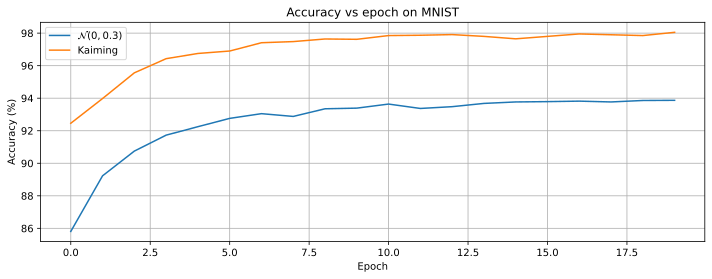

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(accuracies_normal, label=r'$\mathcal{N}(0, 0.3)$')
ax.plot(accuracies_kaiming, label='Kaiming')

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy vs epoch on MNIST')

ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

Посмотрим, как может выглядеть продвинутая инициализация

### `Xavier Initialization`

Рассмотрим функцию активации удовлетворяющую следующим условиям:
1. Нечётность, то есть $g(x) = -g(-x)$
2. $g^{\prime}(0) = 1$

Так, этим условиям удовлетворяет Tanh.

Наша цель избежать затухания градиентов в процессе обучения за счёт правильной начальной инициализации.

Рассмотрим модель нейросети — MLP с функцией активации $g$. Положим $a^{L}, b^{L} \in \mathbb{R}^{n^{L} \times 1}$ — активации и вектор сдвига слоя $L$, $W^{L} \in \mathbb{R}^{n^{L}\times n^{L-1}}$ -- веса слоя $L$, $x \in \mathbb{R}^{n^{0}}$ — вектор входных данных.
$$
a^{0} = x
$$
$$
z^{L} = W^{L}a^{L-1} + b^{L}
$$
$$
a^{L} = g(z^{L})
$$

Сделаем следующие предположения:
1. Все вектора сдвига равны нулю: $b^{L} = 0 \; \forall L$
2. В начале обучения модель находится в *линейном режиме*, то есть $z^{L}_{j} \approx 0 \Rightarrow f(z^{L}) \approx z^{L}$
3. $W^{L}_{jk}, a^{L}_{j}, z^{L}_{j}, x_{j}, \delta^{L}_{j} = \frac{\partial\mathfrak{L}}{\partial z^{L}_{j}}$ — распределены независимо, при этом распределение каждой группы переменных для одного слоя зависит только от номера этого слоя и одинаково для всех переменных.
4. $\mathbb{E}x = \mathbb{E}x_{j} = 0, \mathbb{D}x = \mathbb{D}x_{j} = 1$

В этих предположениях рассмотрим прямой и обратный проход по сети. Рассмотрим, как меняется распределения активаций от слоя к слою.

1. Прямой проход

На прямом проходе мы хотим добиться того, чтобы матожидание и дисперсия активаций оставались неизменными от слоя к слою. Тем самым мы гарантируем что активации не будут "взрываться" или "испаряться" к последним слоям сети.

Очевидно, что из второго предположения следует, что матожидания всех активаций равно 0. Рассмотрим дисперсию активаций:
$$
\mathbb{D}z^{L} = \mathbb{D}z^{L}_{j} = \mathbb{D} \sum\limits_{i=1}^{n^{L-1}} W^{L}_{jk}a^{L-1}_{k} = \sum\limits_{i=1}^{n^{L-1}} \mathbb{D}W^{L}_{jk}\mathbb{D}a^{L-1}_{k} = n^{L-1}\mathbb{D}W^{L}\mathbb{D}a^{L-1}
$$
Учитывая второе условие:
$$
\mathbb{D}z^{L} = n^{L-1}\mathbb{D}W^{L}\mathbb{D}a^{L-1} = n^{L-1}\mathbb{D}W^{L}\mathbb{D}z^{L-1} = n^{L-1}\mathbb{D}W^{L}n^{L-2}\mathbb{D}W^{L-1}\mathbb{D}z^{L-2} = ... = \mathbb{D}x\prod\limits_{l=0}^{L-1}n^{l}\mathbb{D}W^{l+1}
$$

$$
\mathbb{D}z^{L} = \mathbb{D}z^{L-1} \iff n^{L - 1}\mathbb{D}W^{L} = 1 \iff \mathbb{D}W^{L} = \frac{1}{n^{L-1}} \;\;\;\; (6)
$$

2. Обратный проход

На прямом проходе мы хотим добиться того, чтобы матожидание и дисперсия градиентов оставались неизменными от слоя к слою. Тем самым мы гарантируем что градиенты не будут "взрываться" или "испаряться" к первым слоям сети.

$$
\delta^{L}_{j} = \sum\limits_{k=1}^{n^{L+1}}\delta^{L+1}_{k}\frac{\partial z^{L+1}_{k}}{\partial z^{L}_{j}} = \sum\limits_{k=1}^{n^{L+1}}\delta^{L+1}_{k}\frac{\partial }{\partial z^{L}_{j}}\sum\limits_{i=1}^{n^{L}}W^{L+1}_{ki}g(z^{L_{i}}) = \sum\limits_{k=1}^{n^{L+1}}\delta^{L+1}_{k}W^{L+1}_{kj}\frac{\partial g(z^{L_{j}})}{\partial z^{L}_{j}} = \sum\limits_{k=1}^{n^{L+1}}\delta^{L+1}_{k}W^{L+1}_{kj}g^{\prime}(z^{L_{j}})
$$

Учитывая, что $g^{\prime}(x) \approx 1$

$$
\mathbb{E}\delta^{L} = \mathbb{E}\delta^{L}_{j} = n^{L+1}\mathbb{E}W^{L+1}\mathbb{E}\delta^{L+1} = 0 \Leftarrow \mathbb{E}W^{L} = 0
$$

$$
\mathbb{D}\delta^{L} = \mathbb{D}\delta^{L}_{j} = n^{L+1}\mathbb{D}W^{L+1}\mathbb{D}\delta^{L+1} = n^{L+1}\mathbb{D}W^{L+1}n^{L+2}\mathbb{D}W^{L+2}\mathbb{D}\delta^{L+2} = ... = \mathbb{D}\delta^{d}\sum\limits_{m=L+1}^{d-1}n^{m}\mathbb{D}W^{m}
$$


$$
\mathbb{D}\delta^{L} = \mathbb{D}\delta^{L-1} \iff n^{L}\mathbb{D}W^{L} = 1 \iff \mathbb{D}W^{L} = \frac{1}{n^{L}} \;\;\;\; (7)
$$

Заметим, $(6), (7)$ могут выполняться одновременно тогда и только тогда, когда $n^{L} = n^{L+1} \; \forall L$, то есть когда ширина MLP остаётся постоянной. В ином случае, предлагается брать среднее гармоническое полученных оценок:
$$
\begin{cases} 
    \mathbb{E}W^{L} = 0\\
    \mathbb{D}W^{L} = \frac{2}{n^{L-1} + n^{L}} = \frac{2}{n^{\text{in}} + n^{\text{out}}}
\end{cases} \;\;\;\;\; (8)
$$

В зависимости от того, что важнее — сохранение дисперсии активаций или сохранение дисперсий градиентов можно использовать или (6), или (7), но обычно, дисперсия градиентов важнее.

Существует множество распределений, для которых $(8)$ выполняется. Стандартным вариантом является использование равномерного распределения на подходящем интервале:
$$
W^{L}_{ij} \sim \mathcal{U}[-\sqrt{\frac{6}{n^{\text{in}} + n^{\text{out}}}}, \sqrt{\frac{6}{n^{\text{in}} + n^{\text{out}}}}]
$$

Аналогичные результаты могут быть получены для других функций активации — ReLU, Sigmoid. 